# Lecture 2
---
This is an example Jupyter notebook for some of the topics covered in lecture 2, part of the _"Data science tools and Machine Learning"_ track. See also the `data-science-tools.ipynb` notebook for a good overview of the available methods in `numpy`, `pandas`, and `matplotlib`.

## 1. Data handling
---

In [1]:
#Turn off some warnings which we can ignore for this example
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [39]:
# Load iris dataset 
iris = datasets.load_iris()

In [50]:
# Show available properties of the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
# Show dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [52]:
# Show size of dataset
# The dataset has 150 observations and 4 features
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [53]:
# Show feature and target names
print("Feature names: {}".format(iris.feature_names))
print("Target names:  {}".format(iris.target_names))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


In [55]:
# Create pandas.DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
# Add new column(s) for target (type)
df['type']   = iris.target_names[iris.target]
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [77]:
# In cases with incomplete and/or corrupted data, it may be necessary to do some
# cleaning.
# -- Remove duplicates *if* you have reason to suspect that repeated, identical 
#    entries are pathological (they might not be)
# Drop duplicates and null values 
df = df.drop_duplicates().dropna()

# -- Remove rows with 'not-a-number' in the features
nan = np.any(np.isnan(df[iris.feature_names]), axis=1)
df  = df[~nan]

print ("Shape after cleaning: {}".format(df.shape))
df.head()

Shape after cleaning: (149, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
91,6.1,3.0,4.6,1.4,versicolor,1
63,6.1,2.9,4.7,1.4,versicolor,1
103,6.3,2.9,5.6,1.8,virginica,2
6,4.6,3.4,1.4,0.3,setosa,0
59,5.2,2.7,3.9,1.4,versicolor,1


In [78]:
# Save to, and reload from, CSV file
df.to_csv("iris.csv")

# ...

df2 = pd.read_csv("iris.csv", index_col=0)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
91,6.1,3.0,4.6,1.4,versicolor,1
63,6.1,2.9,4.7,1.4,versicolor,1
103,6.3,2.9,5.6,1.8,virginica,2
6,4.6,3.4,1.4,0.3,setosa,0
59,5.2,2.7,3.9,1.4,versicolor,1


In [79]:
# Get summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [80]:
# Access column two ways
df.type
df['type']

91     versicolor
63     versicolor
103     virginica
6          setosa
59     versicolor
          ...    
143     virginica
116     virginica
53     versicolor
38         setosa
47         setosa
Name: type, Length: 149, dtype: object

In [81]:
# List subset of columns
df[['sepal width (cm)', 'petal width (cm)', 'type']].head(10)

,sepal width (cm),petal width (cm),type
91,3.0,1.4,versicolor
63,2.9,1.4,versicolor
103,2.9,1.8,virginica
6,3.4,0.3,setosa
59,2.7,1.4,versicolor
29,3.2,0.2,setosa
27,3.5,0.2,setosa
35,3.2,0.2,setosa
99,2.8,1.3,versicolor
122,2.8,2.0,virginica


In [82]:
# List subset of rows by row number
df[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
82,5.8,2.7,3.9,1.2,versicolor,1
42,4.4,3.2,1.3,0.2,setosa,0
117,7.7,3.8,6.7,2.2,virginica,2
61,5.9,3.0,4.2,1.5,versicolor,1
43,5.0,3.5,1.6,0.6,setosa,0


In [83]:
# ... or, equivalently
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
82,5.8,2.7,3.9,1.2,versicolor,1
42,4.4,3.2,1.3,0.2,setosa,0
117,7.7,3.8,6.7,2.2,virginica,2
61,5.9,3.0,4.2,1.5,versicolor,1
43,5.0,3.5,1.6,0.6,setosa,0


In [84]:
# Sometimes, row number and index differ (e.g. when shuffling)
df = df.sample(frac=1, replace=False, random_state=1234)
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
90,5.5,2.6,4.4,1.2,versicolor,1
110,6.5,3.2,5.1,2.0,virginica,2
84,5.4,3.0,4.5,1.5,versicolor,1
27,5.2,3.5,1.5,0.2,setosa,0
17,5.1,3.5,1.4,0.3,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
92,5.8,2.6,4.0,1.2,versicolor,1
24,4.8,3.4,1.9,0.2,setosa,0
16,5.4,3.9,1.3,0.4,setosa,0
129,7.2,3.0,5.8,1.6,virginica,2


In [85]:
# This illustrates the difference in accessing row by row number 
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
148,6.2,3.4,5.4,2.3,virginica,2
32,5.2,4.1,1.5,0.1,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
130,7.4,2.8,6.1,1.9,virginica,2
141,6.9,3.1,5.1,2.3,virginica,2


In [86]:
# ... or by *index*
df.loc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
57,4.9,2.4,3.3,1.0,versicolor,1
147,6.5,3.0,5.2,2.0,virginica,2
111,6.4,2.7,5.3,1.9,virginica,2
87,6.3,2.3,4.4,1.3,versicolor,1
...,...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica,2
75,6.6,3.0,4.4,1.4,versicolor,1
77,6.7,3.0,5.0,1.7,versicolor,1
20,5.4,3.4,1.7,0.2,setosa,0


In [87]:
# find the measurement with target > 0 and the type for these measurements. Find the unique such type
df.query('target  > 0').type.unique()

array(['versicolor', 'virginica'], dtype=object)

In [91]:
# Count number of rows in each class
df.groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,49,49,49,49,49


In [92]:
# Sort the rows (highest values -> ascending=False) by sepal length showing only the relevant columns (sepal width and petal lenght) and the first 2 rows
df.sort_values(by=['sepal length (cm)'], ascending=False)[['sepal width (cm)', 'petal length (cm)']].head(2)

,sepal width (cm),petal length (cm)
131,3.8,6.4
122,2.8,6.7


In [93]:
# Grop data by type and get the mean of sepal length for each group, and sort by descending value
df.groupby('type')['sepal length (cm)'].mean().sort_values(ascending=False)

type
virginica     6.604082
versicolor    5.936000
setosa        5.006000
Name: sepal length (cm), dtype: float64

In [94]:
# Select only events with sepal length greater than 6.0 and count them grouped by type
mask = df['sepal length (cm)'] > 6.0
df[mask].groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
versicolor,20,20,20,20,20
virginica,41,41,41,41,41


In [95]:
# Convert pandas.DataFrame to numpy.array
array = df['type'].values
array

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolo

In [98]:
# Convert numpy.array to python list
array.tolist()

TypeError: function takes exactly 0 arguments (1 given)

## 2.  Visualisation
---

/var/folders/hq/z2yghcf51g3dbytktxcw5nnc0000gn/T/ipykernel_64569/1497525499.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


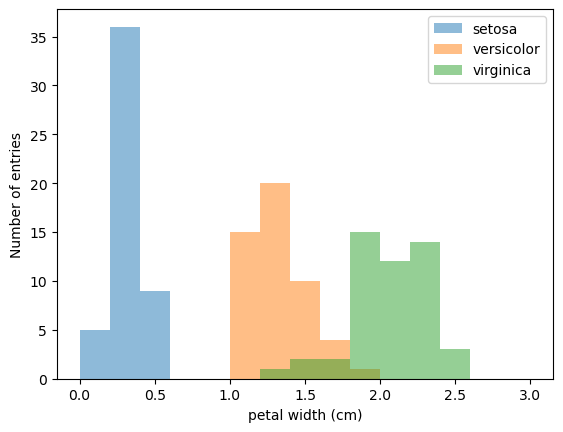

In [97]:
# Feature to plot
feat = 'petal width (cm)'

# Bin range
bins = np.linspace(0, 3, 15 + 1, endpoint=True)

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris.target_names:
    # Boolean mask
    mask = df['type'] == t
    
    # Make histogram for current type
    ax.hist(df[mask][feat], bins=bins, alpha=0.5, label=t)
    pass

# Decorations
ax.legend()
ax.set_xlabel(feat)
ax.set_ylabel("Number of entries")
fig.show()

In [119]:
for t in iris.target_names:
    # Boolean mask
    mask = df['type'] == t
    print (df[mask][feat])
# df[mask] gives you a filtered DataFrame (only rows where mask is True).
#df[mask][feat] gives you the column feat (like 'petal width (cm)') from that filtered DataFrame. 1st column is the index value


27    0.2
17    0.3
11    0.2
24    0.2
16    0.4
32    0.1
5     0.4
45    0.3
48    0.2
10    0.2
44    0.4
31    0.4
42    0.2
41    0.3
2     0.2
36    0.2
8     0.2
40    0.3
26    0.4
30    0.2
3     0.2
14    0.2
21    0.4
0     0.2
25    0.2
28    0.2
34    0.2
29    0.2
35    0.2
38    0.2
37    0.1
46    0.2
47    0.2
18    0.3
4     0.2
9     0.1
12    0.1
49    0.2
39    0.2
43    0.6
7     0.2
13    0.1
33    0.2
6     0.3
20    0.2
15    0.4
1     0.2
19    0.3
23    0.5
22    0.2
Name: petal width (cm), dtype: float64
90    1.2
84    1.5
92    1.2
60    1.0
57    1.0
87    1.3
65    1.4
76    1.4
78    1.5
99    1.3
74    1.3
51    1.5
86    1.5
62    1.0
63    1.4
53    1.3
95    1.2
52    1.5
58    1.3
93    1.0
54    1.5
91    1.4
50    1.4
64    1.3
59    1.4
82    1.2
79    1.0
88    1.3
85    1.6
70    1.8
66    1.5
68    1.5
83    1.6
89    1.3
56    1.6
69    1.1
72    1.5
61    1.5
96    1.3
55    1.3
71    1.3
94    1.3
80    1.1
75    1.4
77    1.7
67    1.0
8

/var/folders/hq/z2yghcf51g3dbytktxcw5nnc0000gn/T/ipykernel_64569/3284790045.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


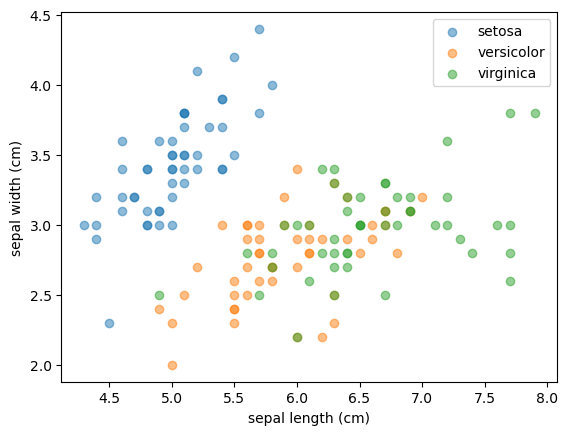

In [120]:
# Features to plot
featx = 'sepal length (cm)'
featy = 'sepal width (cm)'

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris['target_names']:
    # Boolean mask
    mask = df['type'] == t

    # Scatter plot for current type
    ax.scatter(df[mask][featx], df[mask][featy], label=t, alpha=0.5)
    pass

# Draw legend
ax.legend()
ax.set_xlabel(featx)
ax.set_ylabel(featy)
fig.show()

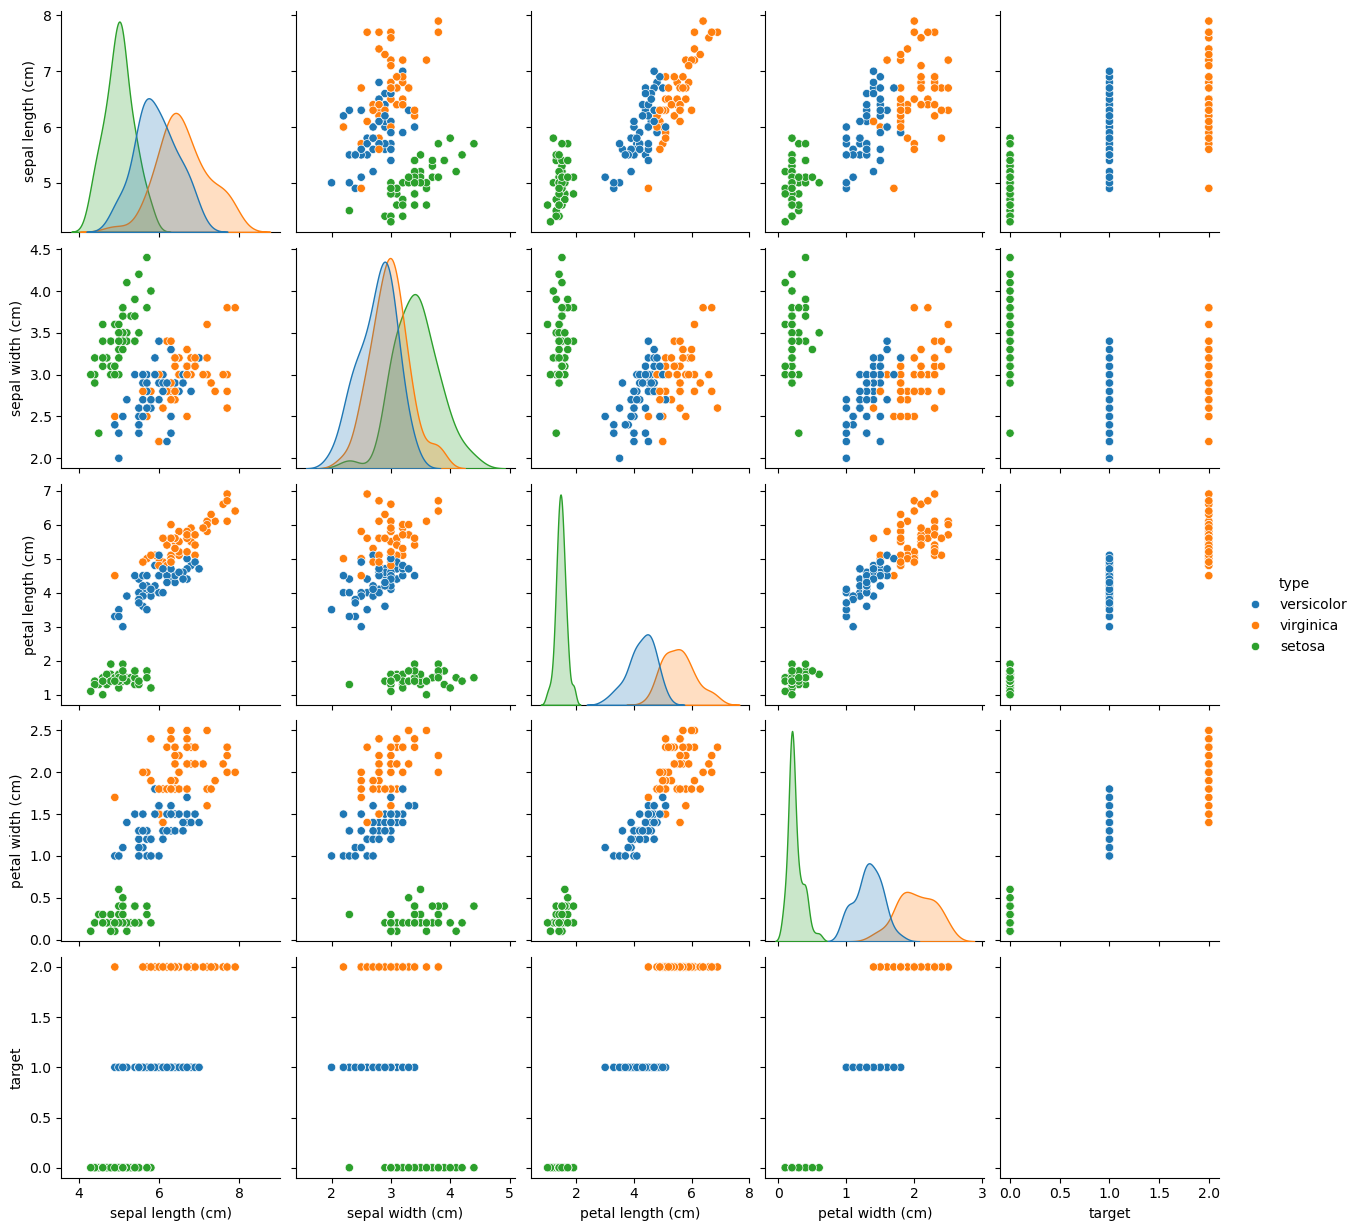

In [121]:
sns.pairplot(df, hue = 'type');

## 4. Decision Trees
---

In [122]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion

In [123]:
X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names, 
      "\npredict whether:", iris.target_names)

given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']


In [132]:
X[:,0][Y == 1]
# Y == 1 gives a boolean mask, that is an array containing true and false

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

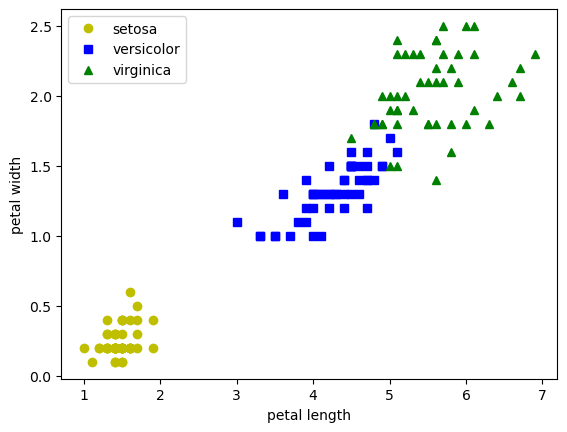

In [134]:
# use matplotlib as you did on previous labs
import matplotlib.pyplot as plt

color_map = ["yo", "bs", "g^"]
for target_index, target_name in enumerate(iris.target_names): #valid because enumerate gives index as well as string (target name)
    plt.plot(X[:, 0][Y==target_index], # petal length on X axis (the ones that equal to target)
             X[:, 1][Y==target_index], # petal width on Y axis (the ones that equal to target)
             color_map[target_index], 
             label=target_name)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

In [133]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Split of the Dataset

* Split the dataset into training and test set is fundamental. Usually the training set consists of 70% of data and the test set of 30%. (test_size option on the train_test_split function is used for the percentage of splitting).
* After the split, the train set (x_train) is used for the training of the algorithm.
* After the training, the test set (y_test) is used to predict the outcome of unseen data.
* The accuracy_score function is then used to give an estimate of the accuracy of the prediction.

In [153]:
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object with these parameters
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)
# Predict the response for test dataset
y_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [143]:
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object with these parameters
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)
# Predict the response for test dataset
y_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [144]:
metrics.accuracy_score?


Signature:
metrics.accuracy_score(
    y_true,
    y_pred,
    *,
    normalize=True,
    sample_weight=None,
)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, default=True
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float or int
    If ``normalize == True``, return the fraction of correctly
    classified samples

In [145]:
from sklearn.tree import export_graphviz
export_graphviz(dt,
                out_file="iris_tree.dot",
                rounded=True,
                filled=True,
                feature_names=iris.feature_names
               )


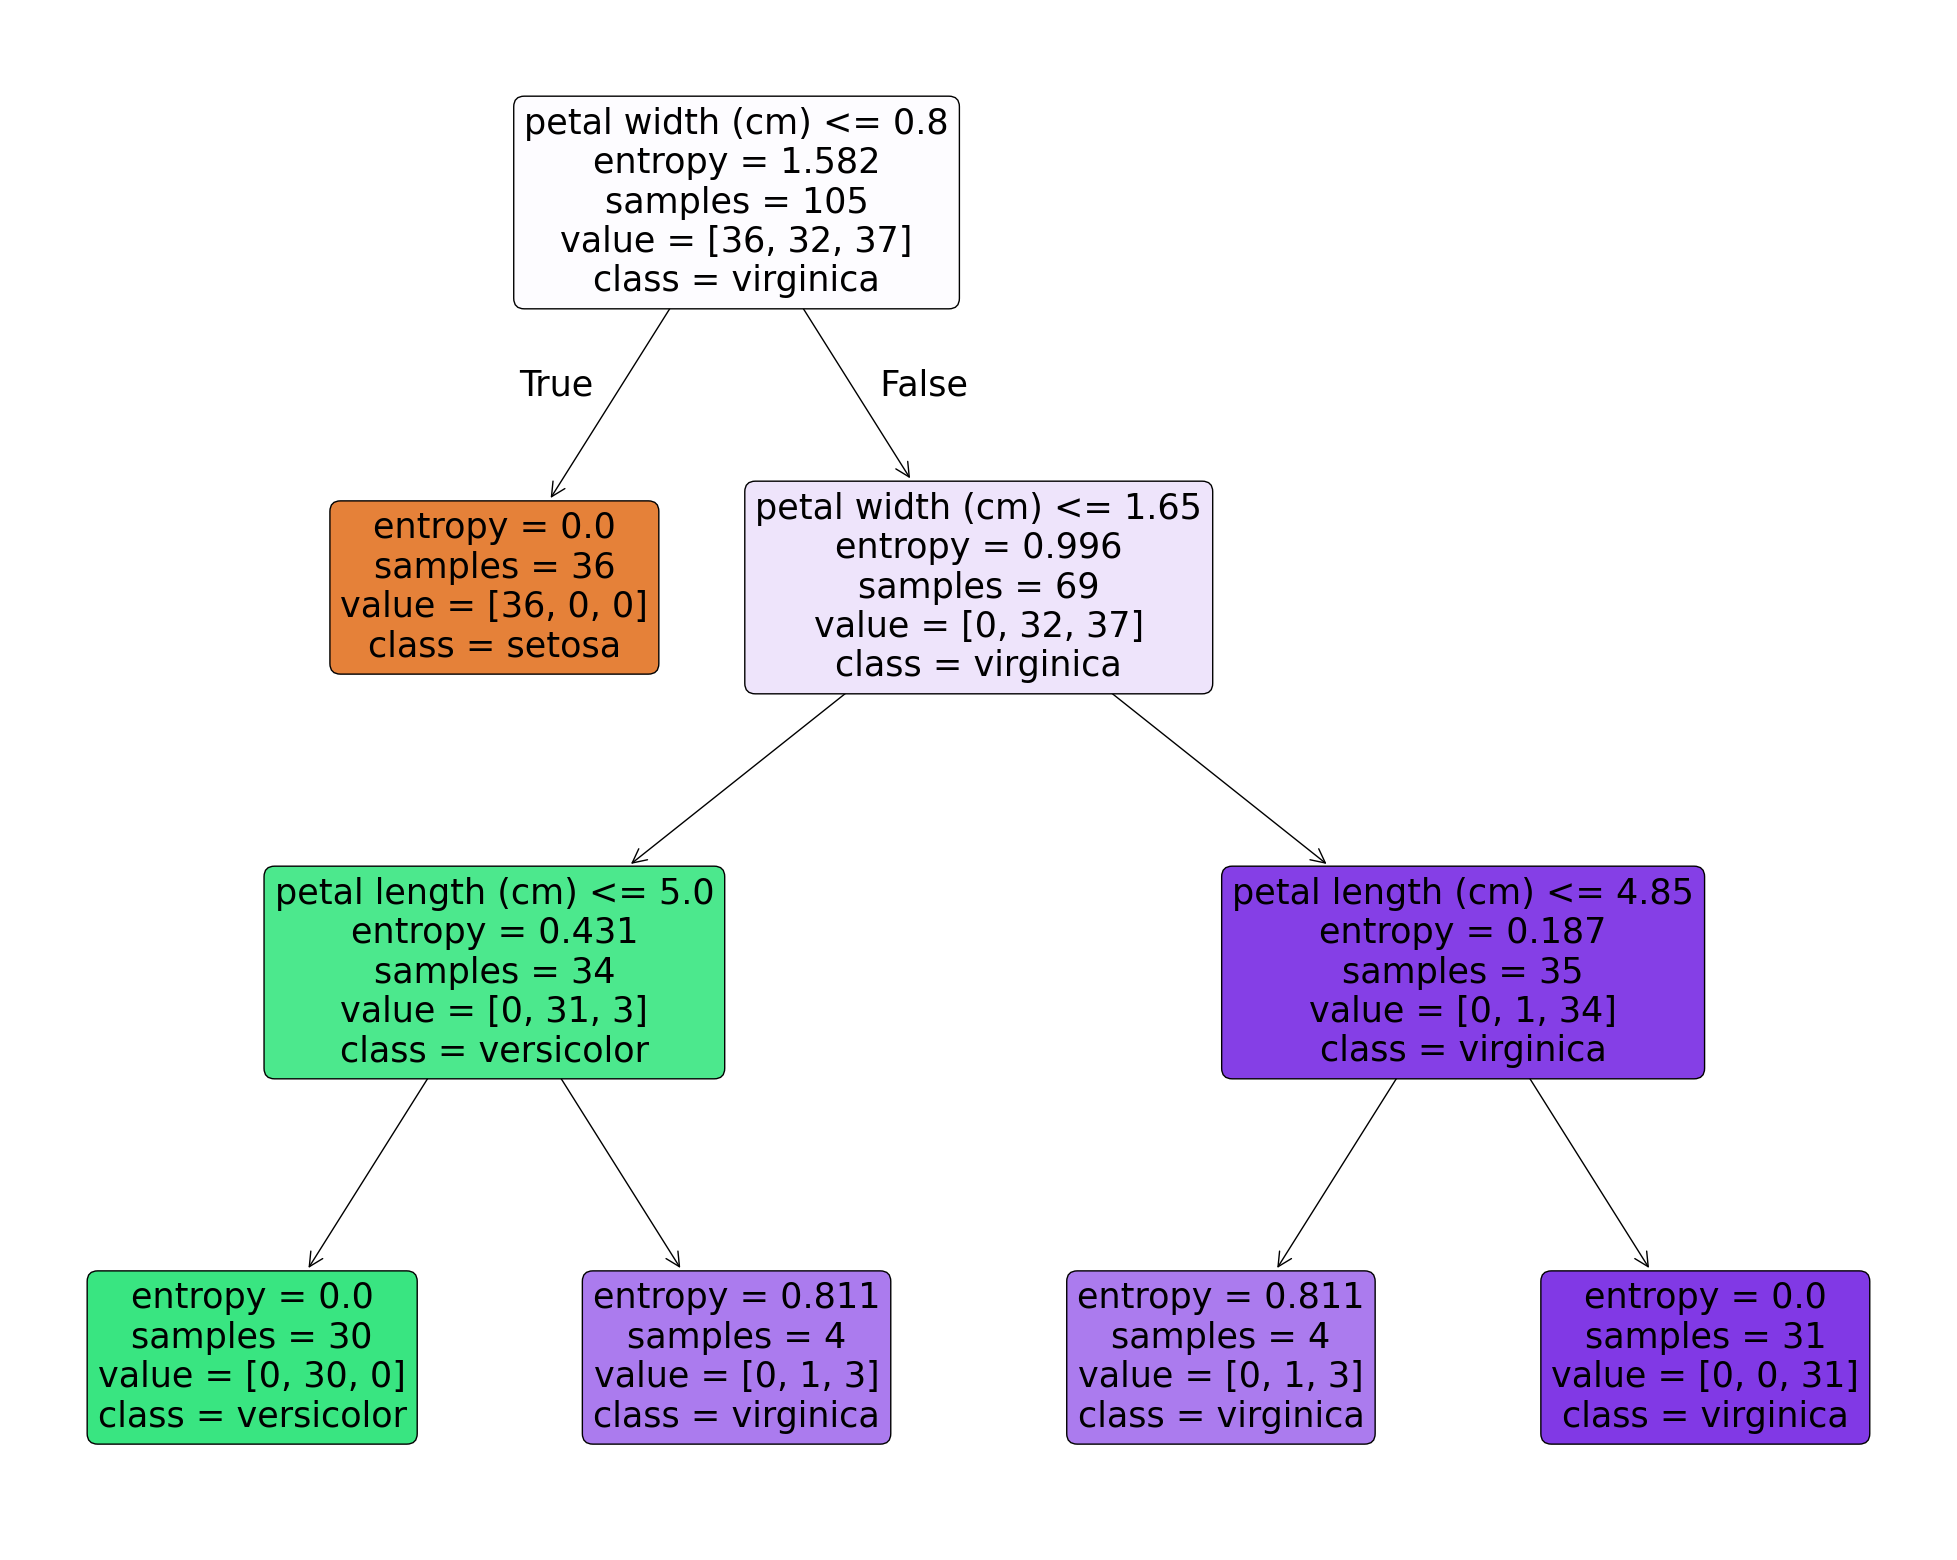

In [154]:
#save the decision_tree as png
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   filled=True,
                  feature_names=iris.feature_names, rounded=True, class_names=list(iris.target_names))
fig.savefig("decision_tree.png")

Feature importance from the DT is calculated during the training (`feature_importances_`) and encodes how successful each feature is at splitting the samples.

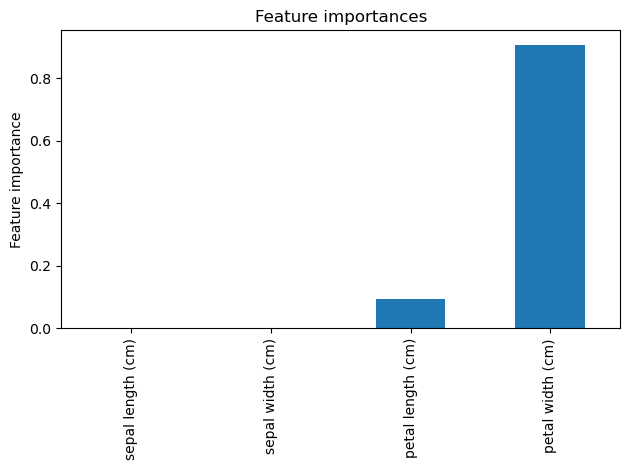

In [155]:
isort = np.argsort(dt.feature_importances_)
forest_importances = pd.Series(dt.feature_importances_[isort], index=np.array(iris.feature_names)[isort])

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature importance")
fig.tight_layout()


In [157]:
isort

array([0, 1, 2, 3])

# Ensamble methods

## Boosting: GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [158]:
# here we use the Gradient boosting classifier
n_estimators = 20

bdt = GradientBoostingClassifier(max_depth=3, n_estimators=n_estimators)
bdt.fit(x_train, y_train)
y_pred = bdt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Bagging: Random forest

In [159]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=20, max_depth=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
